In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the datasets
customers_df = pd.read_csv("Customers (1).csv")
transactions_df = pd.read_csv("Transactions.csv")

In [3]:
# Step 2: Merge datasets
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")

In [4]:
# Step 3: Feature Engineering
# Aggregate transaction data
customer_features = merged_df.groupby("CustomerID").agg(
    total_spend=("TotalValue", "sum"),
    transaction_count=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean"),
    region=("Region", "first")
).reset_index()

In [5]:
# One-hot encode categorical 'region' feature
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_features[["region"]]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(["region"]))

In [6]:
# Combine numerical features with encoded categorical features
scaler = MinMaxScaler()
numerical_features = customer_features[["total_spend", "transaction_count", "avg_transaction_value"]]
scaled_features = scaler.fit_transform(numerical_features)
final_features = pd.concat(
    [pd.DataFrame(scaled_features, columns=numerical_features.columns), region_encoded_df],
    axis=1
)

In [7]:
# Step 4: Clustering
# Choose the number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["cluster"] = kmeans.fit_predict(final_features)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Step 5: Evaluate clustering
db_index = davies_bouldin_score(final_features, customer_features["cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8772550814146375


In [9]:
# Step 6: Visualize clusters
# Reduce dimensionality to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

In [10]:
# Add cluster labels for visualization
visualization_df = pd.DataFrame(reduced_features, columns=["PCA1", "PCA2"])
visualization_df["cluster"] = customer_features["cluster"]

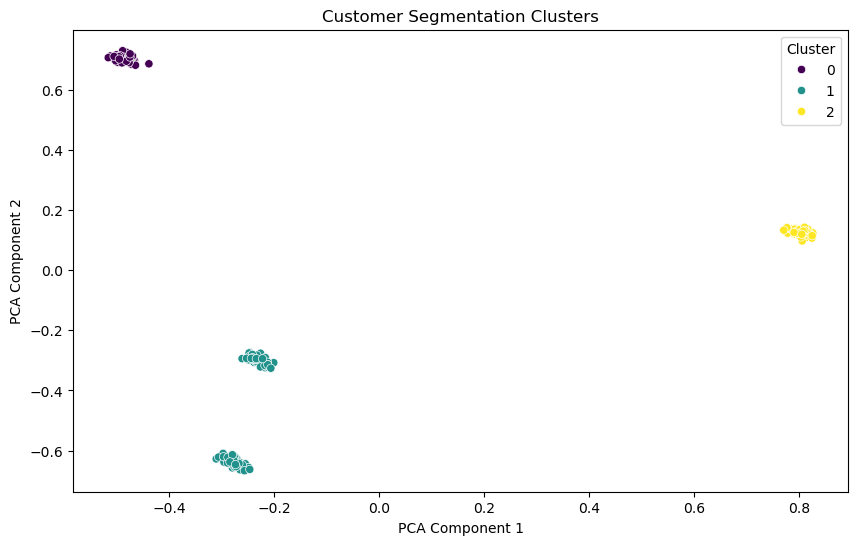

In [11]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visualization_df, x="PCA1", y="PCA2", hue="cluster", palette="viridis")
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [12]:
# Save clustering results
customer_features.to_csv("FirstName_LastName_Clustering.csv", index=False)